Importing the required libraries

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the data

In [3]:
from google.colab import files
uploaded = files.upload()
import io
house= pd.read_csv(io.BytesIO(uploaded['housing.csv']))

Saving housing.csv to housing.csv


Data Analysis- Visualizing the histogram

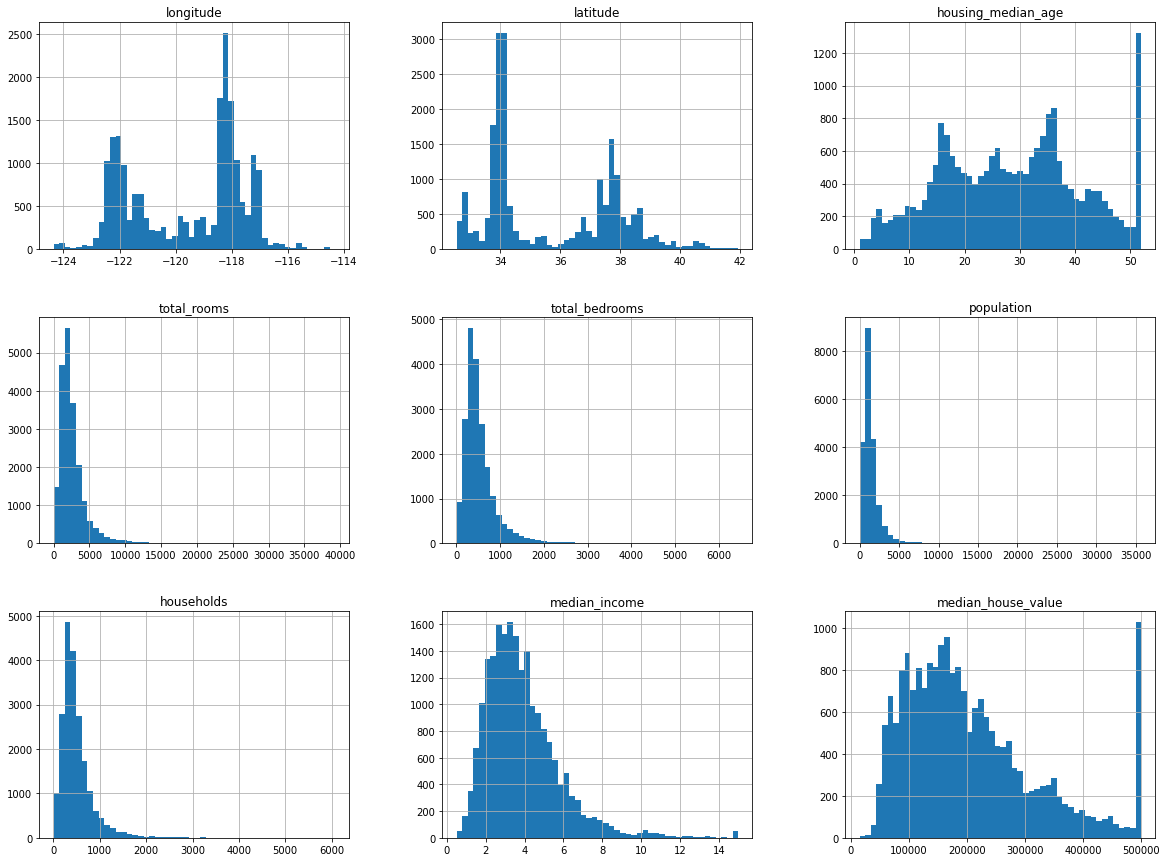

In [4]:
house.hist(bins=50,figsize=(20,15))
plt.show()

Splitting the training and testing set

In [5]:
np.random.seed(39)
def split_train_test(data, testing_ratio):
    shuffle=np.random.permutation(len(data))
    testing_size=int(len(data)*testing_ratio)
    test_list=shuffle[:testing_size]
    train_list=shuffle[testing_size:]
    return data.iloc[train_list], data.iloc[test_list]
training_set, testing_set=split_train_test(house, 0.2)
house=training_set.copy()

Visualizing the population of the data using scatter plot

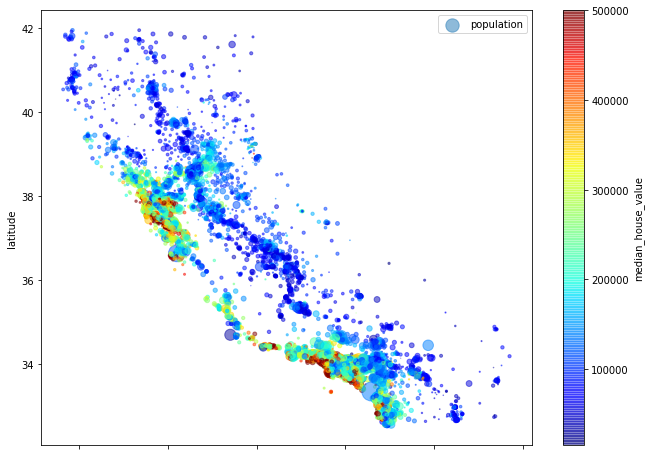

In [6]:
house.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,s=house['population']/100,label='population',c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,figsize=(11,8))
plt.legend()
plt.show()

Visualizing the house price cap

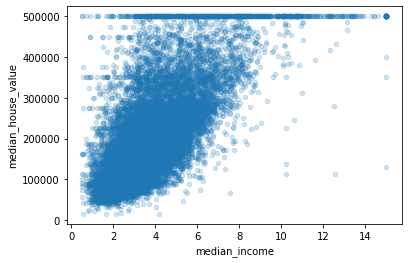

In [7]:
corelation_matrix=house.corr()
corelation_matrix
corelation_matrix["median_house_value"].sort_values(ascending=False)
house.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.2)
house['bedrooms_per_no.of_rooms']=house['total_bedrooms']/house['total_rooms']
house=training_set.drop('median_house_value',axis=1)
house_labels=training_set['median_house_value'].copy()

Cleaning the dataset and Fixing the misssing values 

In [8]:
from sklearn.impute import SimpleImputer
house_numbers=house.drop('ocean_proximity',axis=1)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([  
    ('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

Preprocessing and transforming the data

In [10]:
#Transforming both numerical and categorical columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attributes = list(house_numbers)
cat_attributes = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attributes),
("cat", OneHotEncoder(), cat_attributes),
])
house_final= full_pipeline.fit_transform(house)
house_final.size

214656

### Performing Linear Regression on the cleaned training data

Training

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(house_final,house_labels)

LinearRegression()

Predicting values of 6 samples of training data using trained Linear Regressor

In [12]:
random_data=house.iloc[:6]
random_required_values=house_labels.iloc[:6]
random_data_final=full_pipeline.transform(random_data)
random_data_final
print("Predictions are:",lin_reg.predict(random_data_final))
print("Actual are are:", list(random_required_values))

Predictions are: [226140.93309412 304703.39396242 588726.97425576 303891.67732091
 198314.73247692 377237.84531825]
Actual are are: [168900.0, 375900.0, 500001.0, 285200.0, 361700.0, 336500.0]


Verifying the Root Mean Square Error on the Training Data

In [18]:
from sklearn.metrics import mean_squared_error
house_predictions = lin_reg.predict(house_final)
mse_linear=mean_squared_error(house_labels,house_predictions)
rmse_linear=np.sqrt(mse_linear)
print("Root mean squared error on the training set using Linear Regression is {0}".format(rmse_linear))

Root mean squared error on the training set using Linear Regression is 68833.2880445299


Root mean squared error on the test set

In [19]:
X_test = testing_set.drop("median_house_value", axis=1)
y_test = testing_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_prediction=lin_reg.predict(X_test_prepared)
test_rmse = np.sqrt(mean_squared_error(y_test,final_prediction))
print("Root mean squared error on the test set using Linear Regression is {0}".format(test_rmse))

Root mean squared error on the test set using Linear Regression is 68248.28344619866


## Performing training on the Dataset using polynomial regression

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(2)
house_data_poly=poly.fit_transform(house_final)
lin_reg.fit(house_data_poly,house_labels)

LinearRegression()

Root mean squared error using polynomial regression on the training set

In [51]:
house_predictions_poly = lin_reg.predict(house_data_poly)
mse_poly=mean_squared_error(house_labels,house_predictions_poly)
rmse_poly=np.sqrt(mse_poly)
print("Root mean squared error on the training set using polynomial Regression is {0}".format(rmse_poly))

Root mean squared error on the training set using polynomial Regression is 61944.24677101223


Root mean squared error using polynomial regression on the test set

In [52]:
X_test_poly=poly.fit_transform(X_test_prepared)
final_prediction_poly=lin_reg.predict(X_test_poly)
test_rmse_poly = np.sqrt(mean_squared_error(y_test,final_prediction_poly))
print("Root mean squared error on the test set using Linear Regression is {0}".format(test_rmse_poly))

Root mean squared error on the test set using Linear Regression is 62292.764125131645


## Performing training on the Dataset using SVM regression using RBF Kernel

In [39]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',C=1,epsilon=0.2)
svr.fit(house_final,house_labels)

SVR(C=1, epsilon=0.2)

Root mean squared error using RBF Kernel SVM regression on the training set





In [40]:
house_predictions_svr = svr.predict(house_final)
mse_svr=mean_squared_error(house_labels,house_predictions_svr)
rmse_svr=np.sqrt(mse_svr)
print("Root mean squared error on the training set using SVM Regression is {0}".format(rmse_svr))

Root mean squared error on the training set using SVM Regression is 118229.50723890371


Root mean squared error using RBF Kernel SVM regression on the test set


In [41]:
final_prediction_svr=svr.predict(X_test_prepared)
test_rmse_svr= np.sqrt(mean_squared_error(y_test,final_prediction_svr))
print("Root mean squared error on the test set using SVM Regression is {0}".format(test_rmse_svr))

Root mean squared error on the test set using SVM Regression is 118422.64768013883


SVM is not performing well on the Data

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(house_final,house_labels)

RandomForestRegressor(max_depth=2, random_state=0)

In [45]:
house_predictions_rf = rf.predict(house_final)
mse_rf=mean_squared_error(house_labels,house_predictions_rf)
rmse_rf=np.sqrt(mse_rf)
print("Root mean squared error on the training set using Random Forests Regression is {0}".format(rmse_rf))

Root mean squared error on the training set using Random Forests Regression is 80886.90332749322


In [46]:
final_prediction_rf=rf.predict(X_test_prepared)
test_rmse_rf= np.sqrt(mean_squared_error(y_test,final_prediction_rf))
print("Root mean squared error on the test set using Random Forests Regression is {0}".format(test_rmse_rf))

Root mean squared error on the test set using Random Forests Regression is 80596.17891181745
